# QA section
In this section we are going to check for analysis and data control

### Libraries

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from connect_to_data import download_csv

In [190]:
#FILE_DIR = "../data/netflix_titles.csv"
#Let's start with disney+ data
#netflix = pd.read_csv(FILE_DIR,sep=";")
#netflix.head(2)

In [191]:
FILE_DIR = "../data/disney_plus_titles.csv"
#Let's start with disney+ data
disney_pl = pd.read_csv(FILE_DIR)
print(disney_pl.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB
None


As we can see we have some null values in the director, cast, country, date_added and rating columns

### listed_in

Listed in has genre for titles. So I want to know how many unique genre are

329


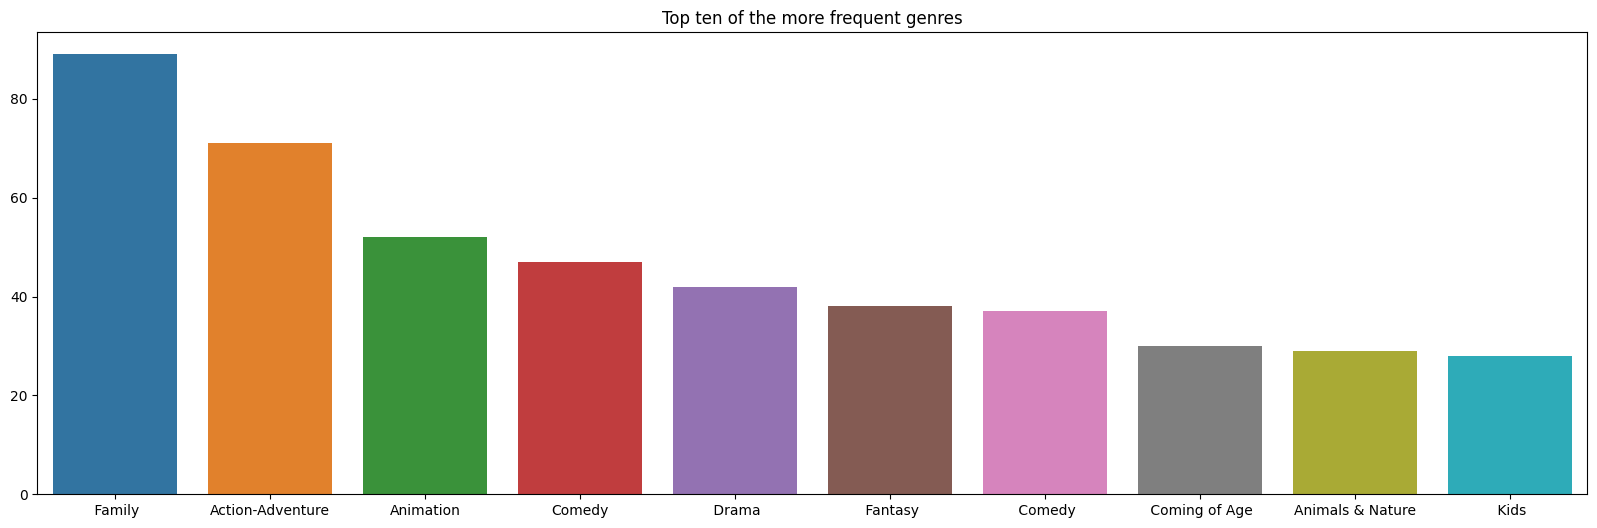

In [192]:
# Unique values of the original column
print(disney_pl.listed_in.nunique())
# Split each unique combination of genre into a list of lists
list_of_genre = list(map(lambda x: x.split(","),
                         list(disney_pl.listed_in.unique())))
# Flatten the list so we have just one enormous list of genres
flattened_list = [genre for sublist in list_of_genre for genre in sublist]
# Remove the space bar in the strings
genre_list = [genre.strip() for genre in flattened_list]
# Cast to set in order to just get rid of the duplicates
genre_list = set(genre_list)
# Number of unique genres
len(genre_list)
# Make a series of the values and their appearance
flattened_list = pd.Series(flattened_list)
# Top ten
counts = flattened_list.value_counts()[:10]
# Create the bar plot
plt.figure(figsize=(20, 6))
plot = sns.barplot(x=counts.index, y=counts.values)
# Add a title
plt.title("Top ten of the more frequent genres")
# Show the plot
plt.show()


### Add a new column 
New column specifying the platform for a latter union between the two csv files.(Netflix and Disney+)

In [193]:
disney_pl["platform"] = "disney"

Split the column of duration in duration and duration units
* duration : int
* duration_units : str

In [194]:
# Split a string column
disney_pl[["duration", "duration_units"]
          ] = disney_pl.duration.str.split(" ", expand=True)
disney_pl["duration_units"] = disney_pl.duration_units.str.lower()
disney_pl["duration"] = disney_pl.duration.astype("int64")
disney_pl = disney_pl.reindex(columns=['show_id', 'type', 'title', 
                                       'director', 'cast', 'country',
                                       'date_added','release_year', 'rating',
                                       'duration', 'duration_units', 'listed_in',
                                       'description','platform'])


# ToDo
* Check the same things with netflix df
* Create the diagram of database
* DDL the df to SQL.

### Types

Text(0.5, 1.0, 'Disney+: Movies vs Tv-Shows')

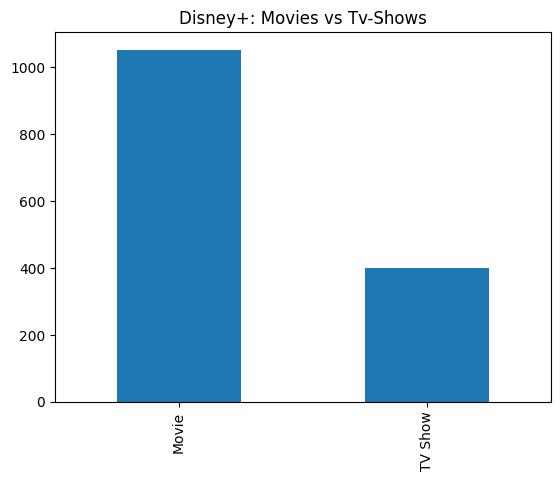

In [146]:
#Check the series duration variable.
disney_pl.type.value_counts().plot(kind="bar")
plt.title("Disney+: Movies vs Tv-Shows")

As we can see there is a much larger portion of the titles that are movies rather than tv shows.

In [149]:
#We can make it a categorical variable
disney_pl.type = disney_pl.type.astype("category")
print(disney_pl.type.unique())
disney_pl.type.info()

['Movie', 'TV Show']
Categories (2, object): ['Movie', 'TV Show']
<class 'pandas.core.series.Series'>
RangeIndex: 1450 entries, 0 to 1449
Series name: type
Non-Null Count  Dtype   
--------------  -----   
1450 non-null   category
dtypes: category(1)
memory usage: 1.7 KB


We can separate the df into two different groups Movies and TV Shows

In [ ]:
disney_mov = disney_pl[disney_pl.type == "Movie"]
disney_tv = disney_pl[disney_pl.type != "Movie"]


## NaN values

### Director

In [68]:
null_directors = disney_pl.director.isnull().sum()
not_null_directors = disney_pl.director.shape[0]
print(f"The number of null in director column is {null_directors}")
print(f"% of null for directors {round(null_directors * 100 / not_null_directors,2)} %")

The number of null in director column is 473
% of null for directors 32.62 %


We have 32.62% percentage of NaN in the directors. <br>That is too much data for just drop it, so we need another approach.
One approach is to replace the NaN for anonymous director. For grouping them.

In [65]:
#Replace the value of NaN with a "anonymous" value, this group the null values.
disney_pl[disney_pl.director.isnull()] = "anonymous_dir"
disney_pl.director.value_counts()

anonymous_dir      473
Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Charles Nichols     12
                  ... 
Simon Wells          1
David Lynch          1
Don Bluth            1
Milt Schaffer        1
Mark Waring          1
Name: director, Length: 610, dtype: int64

### Country

In [70]:
null_countries = disney_pl.country.isnull().sum()
not_null_countries = disney_pl.country.shape[0]
print(f"The number of null in countries column is {null_countries}")

The number of null in countries column is 219


In [63]:
#Filter the rows that dont have values for director and country
rows_country_and_director = disney_pl[disney_pl.country.isnull() & disney_pl.director.isnull()].shape[0]
# Filter the rows that dont have values for director or country 
rows_country_or_director = disney_pl[disney_pl.country.isnull() | disney_pl.director.isnull()].shape[0]

True

In [72]:

disney_pl[disney_pl.date_added.isnull() | disney_pl.rating.isnull()].shape[0]

6